# Introduction
In this notebook, we are using the Keras API in Tensorflow 2.X to build an image classifier to recognize Handwritten digits using the Mnist data.

# Loading Tensorflow and checking the version

In [1]:
import tensorflow as tf
print(tf.__version__)

2.7.0


- If not installed, uncomment the following cell. 
- **PS:** using pip not conda as everything on colab is prepared for you (cuda).

In [2]:
#!pip install tensorflow==2.5.0 

# Data Loading and exploring

In [3]:
from tensorflow.keras.datasets import mnist

(training_images, training_labels),(testing_images, testing_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
print("The number of training images is {}".format(training_images.shape[0]))
print("The number of testing images is {}".format(testing_images.shape[0]))
print("The shape of an image is {}X{}".format(training_images.shape[1],
                                              training_images.shape[2]))

The number of training images is 60000
The number of testing images is 10000
The shape of an image is 28X28


In [5]:
import numpy as np
import random
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt

3


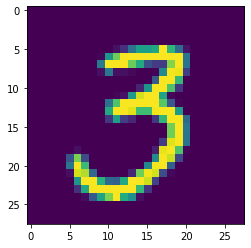

In [6]:
img_number = random.randint(0, training_images.shape[0])
plt.imshow(training_images[img_number])
print(training_labels[img_number])

All of the pixels values are between 0 and 255. If we are training a neural network, for various reasons it's easier that all values are between 0 and 1.

This can be done using `normalizing`

In [7]:
training_images  = training_images / 255.0 # Gray image
testing_images = testing_images / 255.0

# Defining the model using **Sequential** API

In [8]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [9]:
model = Sequential([Flatten(input_shape=(28,28)), 
                    Dense(128, activation=tf.nn.relu), 
                    Dense(10, activation=tf.nn.softmax)])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


Define the **optimizer** and the **loss**

In [11]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

Train the model

In [12]:
model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 3ms/step - loss: 0.2599 - accuracy: 0.9251
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1155 - accuracy: 0.9655
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0812 - accuracy: 0.9755
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0591 - accuracy: 0.9822
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0463 - accuracy: 0.9856


Evaluate the model on the test images

In [13]:
evaluation = model.evaluate(testing_images, testing_labels)
print("Accuracy on the testing images is {}".format(evaluation[1]*100))

313/313 [==============================] - 1s 3ms/step - loss: 0.0786 - accuracy: 0.9758
Accuracy on the testing images is 97.57999777793884
